# Effect of Noise
Consider a message $X\in\{-1,+1\}$ which is observed through noise to yield

$
Y=X+N
$

We assume that the noise $N$ is a Gaussian random variable with zero mean and variance $\sigma^2$.

## Histogram and Probability Density Function
Let us visualise a histogram of noise samples.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
variance = 1
std_dev = np.sqrt(variance)
num_samples = 10000

noise_samples = std_dev * np.random.randn(num_samples)

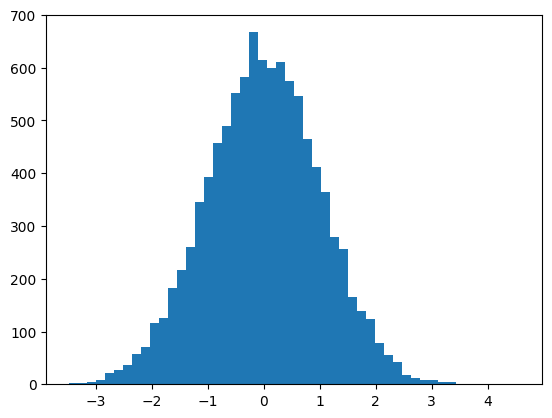

In [3]:
plt.hist(noise_samples, 50);

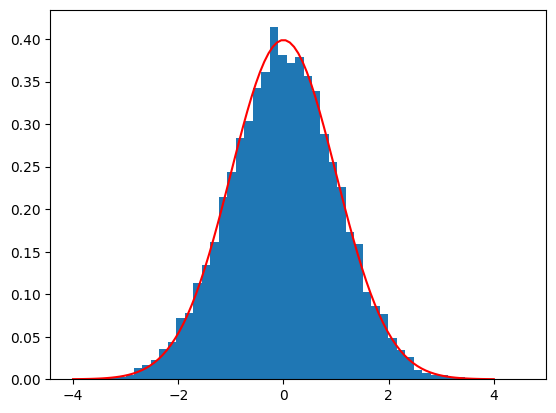

In [4]:
x = np.linspace(-4 * std_dev,  4 * std_dev, 100)
plt.hist(noise_samples, 50, density=True);
plt.plot(x, norm.pdf(x, scale=std_dev), '-r')

The message $X$ takes values $-1$ and $+1$ with equal probability. $X$ is a Bernoulli random variable with probalility of success given by $\frac{1}{2}$.


## Estimation
When we observe $Y$, we would like to estimate $X$. A reasonable rule is

\begin{equation}
  \hat{X}=\begin{cases}
    +1, & \text{if $Y>0$}.\\
    -1, & \text{if $Y<0$}.
  \end{cases}
\end{equation}

We are interested in the probability of error. Error occurs when $\hat{X}\neq X$.

### When $X= +1$
In this case an error occurs when $Y<0$. We therefore need to compute 

$
P(Y<0|X=+1)
$

To do this, we need to know the distribution $f_{Y|X}(y|x)$. We have

\begin{equation}
f_{Y|X}(y|x)=\mathcal{N}(y;x,\sigma^2)
\end{equation}

The probability of error becomes

$
P(Y<0|X=+1)=\int_{-\infty}^0 \mathcal{N}(y;1,\sigma^2) dy
$

This can be shown to be $\Phi(-\frac{1}{\sigma})$ where $\Phi(.)$ is the cummulative distribution function of the standard normal.


In [5]:
X = np.ones(num_samples)
Y = X + noise_samples 

np.sum(Y < 0) / num_samples

0.1635

In [6]:
norm.cdf(-(1/std_dev))

0.15865525393145707